# Descriptive Analytics for Mixed Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df = pd.read_excel('desciptive.xlsx')

In [4]:
df.head()

,id,calcium,iron,protein,vitamin A,vitamin C,age,sex,bmi,children,smoker,region,charges
0,1,522.29,10.188,42.561,349.13,54.141,38,male,19.300,0,yes,southwest,15820.6990
1,2,343.32,4.113,67.793,266.99,24.839,41,female,31.600,0,no,southwest,6186.1270
2,3,858.26,13.741,59.933,667.90,155.455,30,male,25.460,0,no,northeast,3645.0894
3,4,575.98,13.245,42.215,792.23,224.688,18,female,30.115,0,no,northeast,21344.8467
4,5,1927.50,18.919,111.316,740.27,80.961,61,female,29.920,3,yes,southeast,30942.1918


## Data Cleaning

In [5]:
# remove unwantend columns
df.drop(columns='id',inplace=True)

In [6]:
df.head()

,calcium,iron,protein,vitamin A,vitamin C,age,sex,bmi,children,smoker,region,charges
0,522.29,10.188,42.561,349.13,54.141,38,male,19.300,0,yes,southwest,15820.6990
1,343.32,4.113,67.793,266.99,24.839,41,female,31.600,0,no,southwest,6186.1270
2,858.26,13.741,59.933,667.90,155.455,30,male,25.460,0,no,northeast,3645.0894
3,575.98,13.245,42.215,792.23,224.688,18,female,30.115,0,no,northeast,21344.8467
4,1927.50,18.919,111.316,740.27,80.961,61,female,29.920,3,yes,southeast,30942.1918


## Task 1: Quantitive Data Analysis

---

- Compute average, median, and mode values for the quan3ta3ve.
- Construct a sales (charges) data frequency distribu3on.
- Ascertain data spread by calcula3ng range, variance, and standard devia3on.
- Develop visual aids like histograms, box plots, or bar graphs to depict sales figures.

In [9]:
# df.dtypes
# df.columns.to_list()

- Compute average, median, and mode values for the quantitative.

In [12]:
Quantitative_columns = ['calcium','iron','protein','vitamin A','vitamin C','age','bmi','children',]
Qualitative_columns = ['sex','smoker','region']

In [14]:
quantitative_data = df[Quantitative_columns]

average_values = quantitative_data.mean()
median_values = quantitative_data.median()
mode_values = quantitative_data.mode().iloc[0]


# Create a DataFrame for better presentation
summary_table = pd.DataFrame({
    'Average': average_values,
    'Median': median_values,
    'Mode': mode_values
})

print("Summary of Quantitative Data:")
print(summary_table)

Summary of Quantitative Data:
              Average    Median    Mode
calcium    624.338219  549.3800   7.440
iron        11.136673   10.0925   7.136
protein     65.990699   61.4285  73.267
vitamin A  841.556055  525.2750   0.000
vitamin C   78.458196   53.5850   0.000
age         39.593151   40.0000  19.000
bmi         30.963404   30.6900  32.300
children     1.071233    1.0000   0.000


- Construct a sales (charges) data frequency distribution:

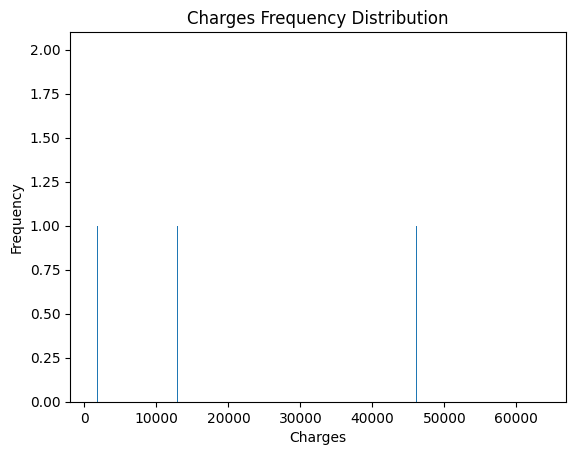

In [15]:
charges_frequency = df['charges'].value_counts().sort_index()

plt.bar(charges_frequency.index, charges_frequency.values)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Frequency Distribution')
plt.show()

- Ascertain data spread by calculating range, variance, and standard deviation:

In [16]:
data_spread = pd.DataFrame({
    'Range': quantitative_data.max() - quantitative_data.min(),
    'Variance': quantitative_data.var(),
    'Standard Deviation': quantitative_data.std()
})

print(data_spread)

               Range      Variance  Standard Deviation
calcium     2859.000  1.565989e+05          395.725745
iron          58.668  3.571731e+01            5.976396
protein      251.012  9.310199e+02           30.512619
vitamin A  34434.270  2.689709e+06         1640.033257
vitamin C    433.339  5.337309e+03           73.056887
age           46.000  2.011799e+02           14.183791
bmi           33.100  3.670461e+01            6.058433
children       5.000  1.383122e+00            1.176062


- Develop visual aids like histograms, box plots, or bar graphs to depict sales figures:

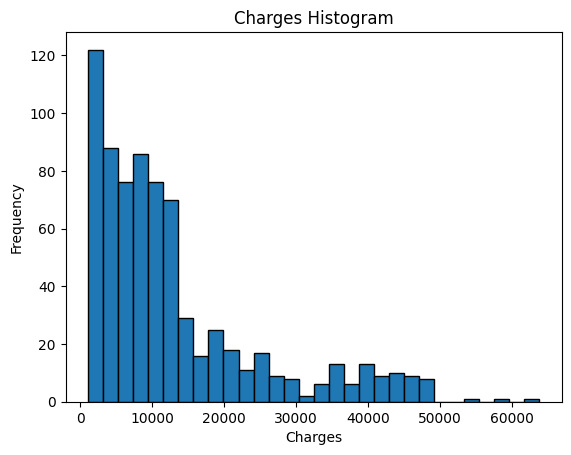

In [17]:
# Histogram:
plt.hist(df['charges'], bins=30, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Histogram')
plt.show()

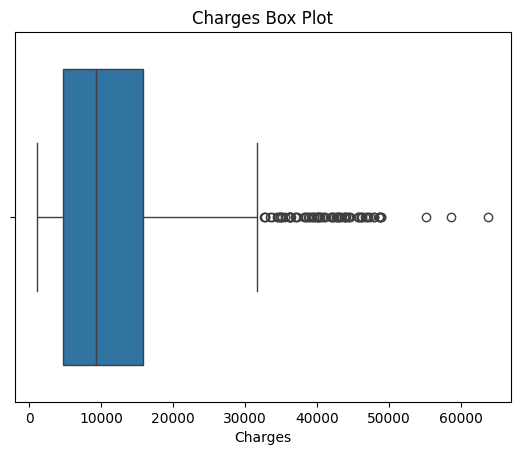

In [18]:
# Box Plot:
sns.boxplot(x='charges', data=df)
plt.xlabel('Charges')
plt.title('Charges Box Plot')
plt.show()

## Task 2: Qualita&ve Data Analysis

- Review categorial data.
- Quan3fy and visualize the categorial data with meaningful categories and charts.
- Create dummy variables for region and smoker, and one other categorial data.
- Compile your discoveries into a narra3ve, emphasizing major insights and poten3al links to the 
sales figures.
- Analyze correla3ons between different attributes, if exists.

- Review categorial data.

In [19]:
# Extracting categorical data
categorical_data = df[Qualitative_columns]

- Quan3fy and visualize the categorial data with meaningful categories and charts.


Sex Data:
sex
male      367
female    363
Name: count, dtype: int64


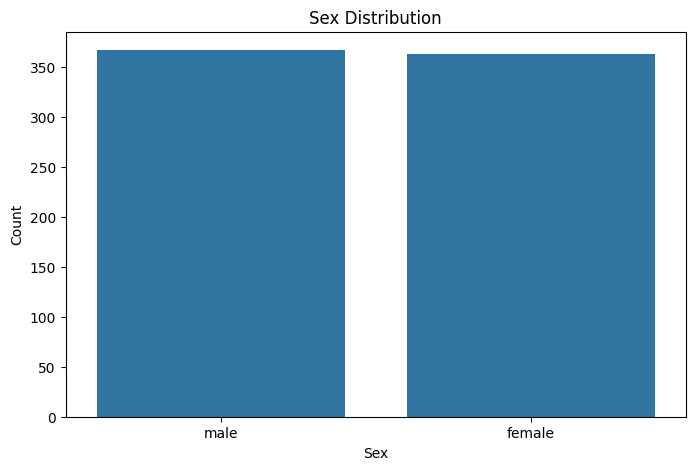


Smoker Data:
smoker
no     592
yes    138
Name: count, dtype: int64


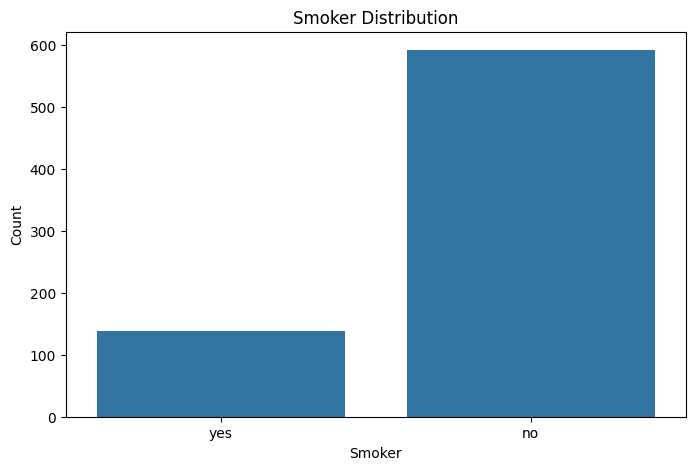


Region Data:
region
southeast    209
northeast    183
southwest    174
northwest    164
Name: count, dtype: int64


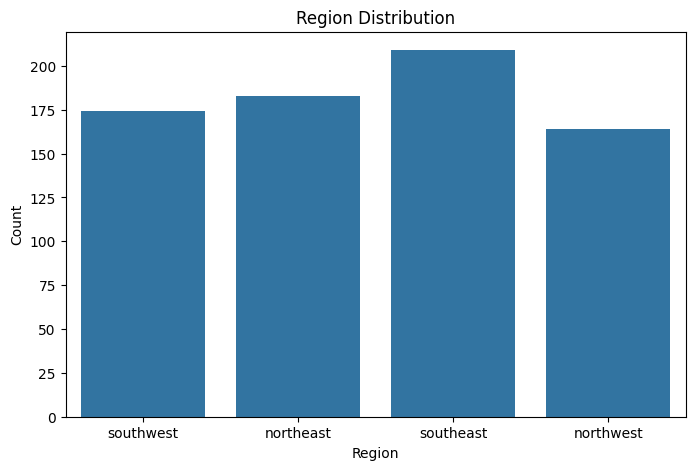

In [20]:
# Quantify and visualize categorical data
for column in categorical_data.columns:
    print(f"\n{column.capitalize()} Data:")
    print(categorical_data[column].value_counts())

    # Visualize using a bar chart
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df)
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'{column.capitalize()} Distribution')
    plt.show()

- Create dummy variables for region and smoker, and one other categorial data.

In [21]:
# Create dummy variables for 'region', 'smoker', and one other categorical data
df_dummies = pd.get_dummies(df, columns=['region', 'smoker', 'sex'], drop_first=True)

In [22]:
df_dummies.head()

,calcium,iron,protein,vitamin A,vitamin C,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
0,522.29,10.188,42.561,349.13,54.141,38,19.300,0,15820.6990,False,False,True,True,True
1,343.32,4.113,67.793,266.99,24.839,41,31.600,0,6186.1270,False,False,True,False,False
2,858.26,13.741,59.933,667.90,155.455,30,25.460,0,3645.0894,False,False,False,False,True
3,575.98,13.245,42.215,792.23,224.688,18,30.115,0,21344.8467,False,False,False,False,False
4,1927.50,18.919,111.316,740.27,80.961,61,29.920,3,30942.1918,False,True,False,True,False


## Narrative Analysis of Categorical Variables and Sales Figures:

1. Sex Distribution:
The dataset includes information about the gender distribution of individuals. The bar chart reveals a relatively balanced representation of males and females. This indicates that the dataset is not skewed towards one gender, which is crucial for unbiased analyses.

2. Smoker Status:
The 'smoker' category shows a significant disparity, with a notable proportion of smokers compared to non-smokers. The countplot emphasizes the importance of considering the impact of smoking habits on health-related variables and, potentially, on insurance charges.

3. Regional Distribution:
The 'region' variable provides insights into the geographic distribution of the dataset. The countplot illustrates that the data is not evenly distributed across regions. For a comprehensive analysis, it's essential to understand how regional differences may influence health-related parameters and, consequently, insurance charges.

- Analyze correlations between different attributes, if exists.

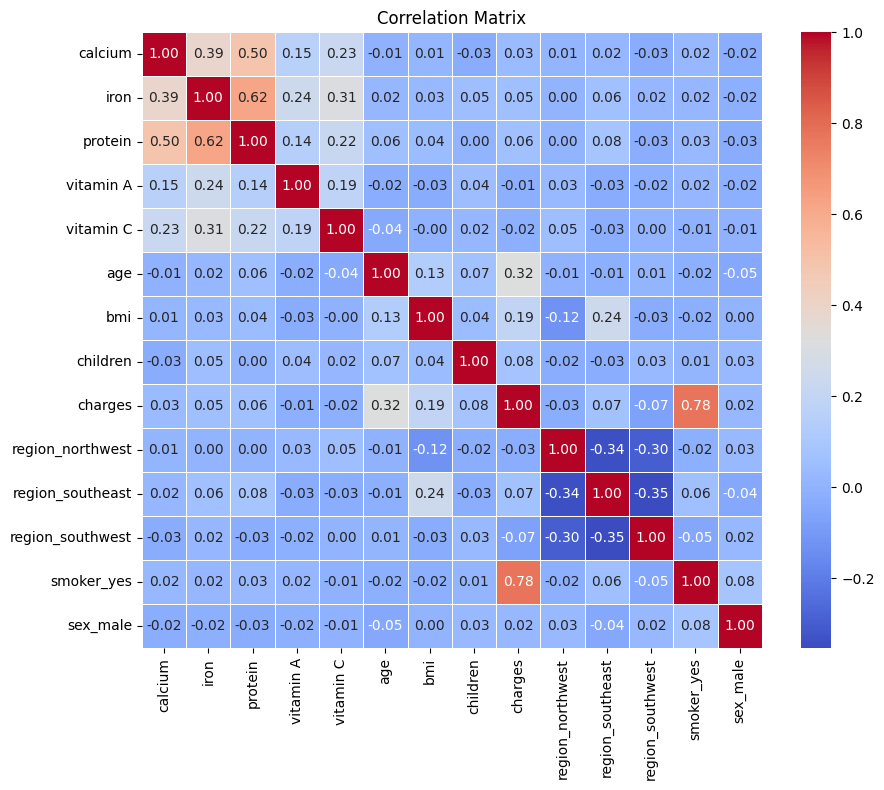

In [24]:
# Analyze correlations between different attributes
correlation_matrix = df_dummies.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()